<a href="https://colab.research.google.com/github/bing020815/Computer-Vision/blob/master/regression/Normal_Distribution_in_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normal Distribution
Normal distribution(Gaussian distribution) is one of the most important concepts.  

Whenever we run a model or perform data analysis, we need to check the distribution of dependent ariables and independent variavles and to see if they are normally distributed. If some variables are skewed or not normally distributed, it will affact the accountability of significant factors.  


The variable that should be normally distributed is `prediction error`.   


\begin{equation}
Y = Coef * X + C + Error  
  \end{equation}


 If the `prediction error` is **normal distribution with mean 0**, the siginificance factors conlcuded from the regression is reliable. However, if te the `distribution of error` significantly **deviates from the mean 0 and not being normally distributed**, the factors that we choose to be significant may not actually be significant enough to contribute to the output `y`.  

To select the significant predicting factors, after we have constructed a model and prediction, we should plot a chart to see the distribution of prediction error.  

In [0]:
# create a normal distributed data and non-normal data
import numpy as np
from scipy import stats
sample_normal=np.random.normal(loc=0, scale=4, size = 1000)
sample_nonnormal = stats.loggamma.rvs(c= 5, loc=0, scale=1, size=1000, random_state=1) + 20

To test normality of data, we can plot distribution plot, QQ-plot or using [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)


1. Distribution plot:
    Simply plot the distribution curve and see whether the plot follows bell **curve shape**. Non-normal sample is clearly left tailed.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


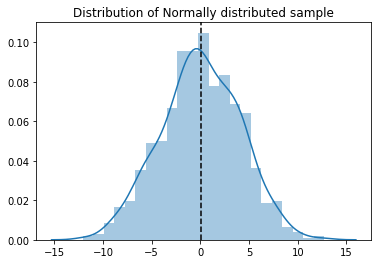

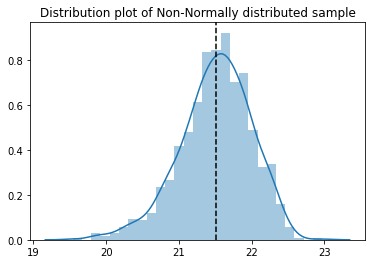

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sample_normal)
plt.axvline(x=np.mean(sample_normal), color='k', linestyle='--')
plt.title('Distribution of Normally distributed sample')
plt.show()

sns.distplot(sample_nonnormal)
plt.axvline(x=np.mean(sample_nonnormal), color='k', linestyle='--')
plt.title('Distribution plot of Non-Normally distributed sample')
plt.show()

2. Use the `Shapiro-Wilk test`, based on decided p-value threshold, usually we reject H0 at 5% significance level meaning if p-value is greater than 0.05 then we accept it as normal distribution:
**PS**: If sample size is greater than 5000, you should use test statistics instead of p-value as the indicator to decide.

In [0]:
# null hypothesis: that the data was drawn from a normal distribution
test1= stats.shapiro(sample_normal)
test2 = stats.shapiro(sample_nonnormal)
print ('Test Statistics: {}\nP-value: {}\nFail to reject H0: the data was dran from a normal distribution\n'.format(test1[0], test1[1]))
print ('Test Statistics: {}\nP-value: {}\nReject H0: the data was not dran from a normal distribution\n'.format(test2[0], test2[1]))

Test Statistics: 0.9982317686080933
P-value: 0.3935606777667999
Fail to reject H0: the data was dran from a normal distribution

Test Statistics: 0.9849225282669067
P-value: 1.2197391541235447e-08
Reject H0: the data was not dran from a normal distribution



3. QQ-plot, very popular plot to see whether the distribution of data follow normal distribution.

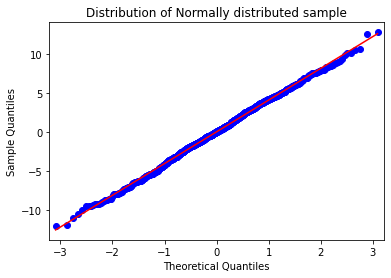

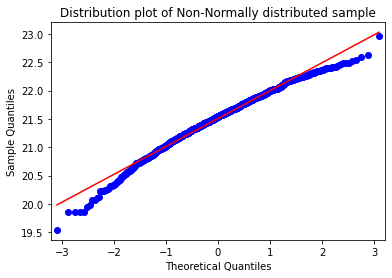

In [0]:
import statsmodels.api as sm
fig = sm.qqplot(sample_normal,line='s')
plt.title('Distribution of Normally distributed sample')
plt.show()

fig = sm.qqplot(sample_nonnormal,line='s')
plt.title('Distribution plot of Non-Normally distributed sample')
plt.show()

## Fix the normality issue

Usually there are 2 reasons why this issue(error does not follow normal distribution) would occur:
1. Dependent or independent variables are not normally distributed (based on skewness or kurtosis of the variable)
2. Existence of a few outliers/extreme values which disrupt the model prediction

The solution for those are:
1. Remove `outlier` from both `dependent` and `independent variables`
2. Transform some non-normal variables to normal by using transformation function, such as `box-cox transformation`

Below is the mathematic formula for Box-Cox transformation. Lambda value will be decided based on the data points to provide the best normal distribution shape after the transformation. We can directly use Python package to help us transform the data.

\begin{equation}
       y_i^{(\lambda)}= 
        \begin{cases}
            \frac{y_i^{\lambda}-1}{\lambda} & \text{if $\lambda \neq 0 $,} \\
            \ln y_i & \text{if $\lambda = 0$}
        \end{cases}
    \end{equation}

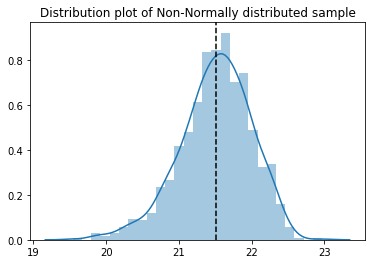

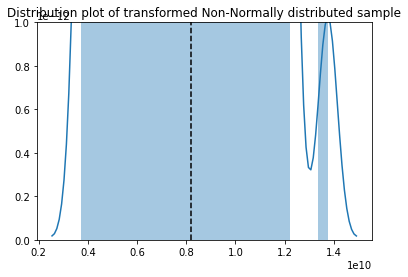

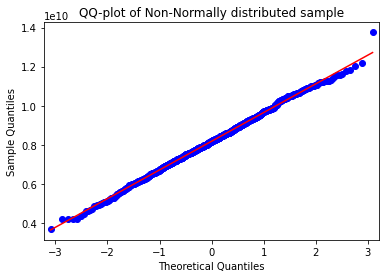

Shapiro-Wilk test

Test Statistics: 0.9982317686080933
P-value: 0.3935606777667999
Fail to reject H0: the data was dran from a normal distribution



In [0]:
#transform the data using box-cox transformation
sample_transformed, lambd = stats.boxcox(sample_nonnormal)
#plot the distribution curve and QQ-plot for transformed data
sns.distplot(sample_nonnormal)
plt.title('Distribution plot of Non-Normally distributed sample')
plt.axvline(x=np.mean(sample_nonnormal), color='k', linestyle='--')
plt.show()

sns.distplot(sample_transformed)
plt.title('Distribution plot of transformed Non-Normally distributed sample')
plt.axvline(x=np.mean(sample_transformed), color='k', linestyle='--')
# plt.ylim(bottom = 0 , top = 0.001)
plt.show()

fig = sm.qqplot(sample_transformed,line='s')
plt.title('QQ-plot of Non-Normally distributed sample')
plt.show()

print("Shapiro-Wilk test\n")
test3= stats.shapiro(sample_normal)
print ('Test Statistics: {}\nP-value: {}\nFail to reject H0: the data was dran from a normal distribution\n'.format(test3[0], test3[1]))


We can see that after the `box-cox transformatio`n, the non-normal distributed sample is normally distributed.

In conclusion, if you try to find `significant predicting factors` or define the `confidence interval`, please remember to check the `distribution of the error term` after the model has being built.   
 
If dependent variables or independent variables are not normal distributed then we can use `box-cox transformation` to transform it to make error term more normally distributed.

Except for the normality statistical assumption, there are other statistical assumptions in regression model, such as `Multi-Collinearity` in Regression.